In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from costs import *
from lab_helpers import *
from plots_lab4 import *
from my_helpers import *
import pandas as pd
import matplotlib.pyplot as plt

## To Do Graphs
- PCA Decomposition + Classification
- Correlation
- Changing loss for different algorithms
- ???

## To Do tasks
- Manuel: implement K-fold to choose degree, change split data , deal with outliers, adding log colm (?)
- Gabbo: ?
- Marco: ?

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
y_or, tX_or, ids = load_csv_data(DATA_TRAIN_PATH)

In [86]:
y = y_or
tX = tX_or

### Extra preprocessing for logistic (run only if you wanna run that)

In [15]:
y = y_for_logistic(y)

## Data preprocessing

In [35]:
x_tr_tot, x_te_tot, y_tr_tot, y_te_tot = split_data(y,tX,0.8,1)

In [90]:
y_tr, tX_tr, indexes_tr, means_tr, std_tr = preprocessing(y_tr_tot, x_tr_tot)

In [10]:
y_te, tX_te, indexes_te, means_te, std_te = preprocessing(y_te_tot, x_te_tot)

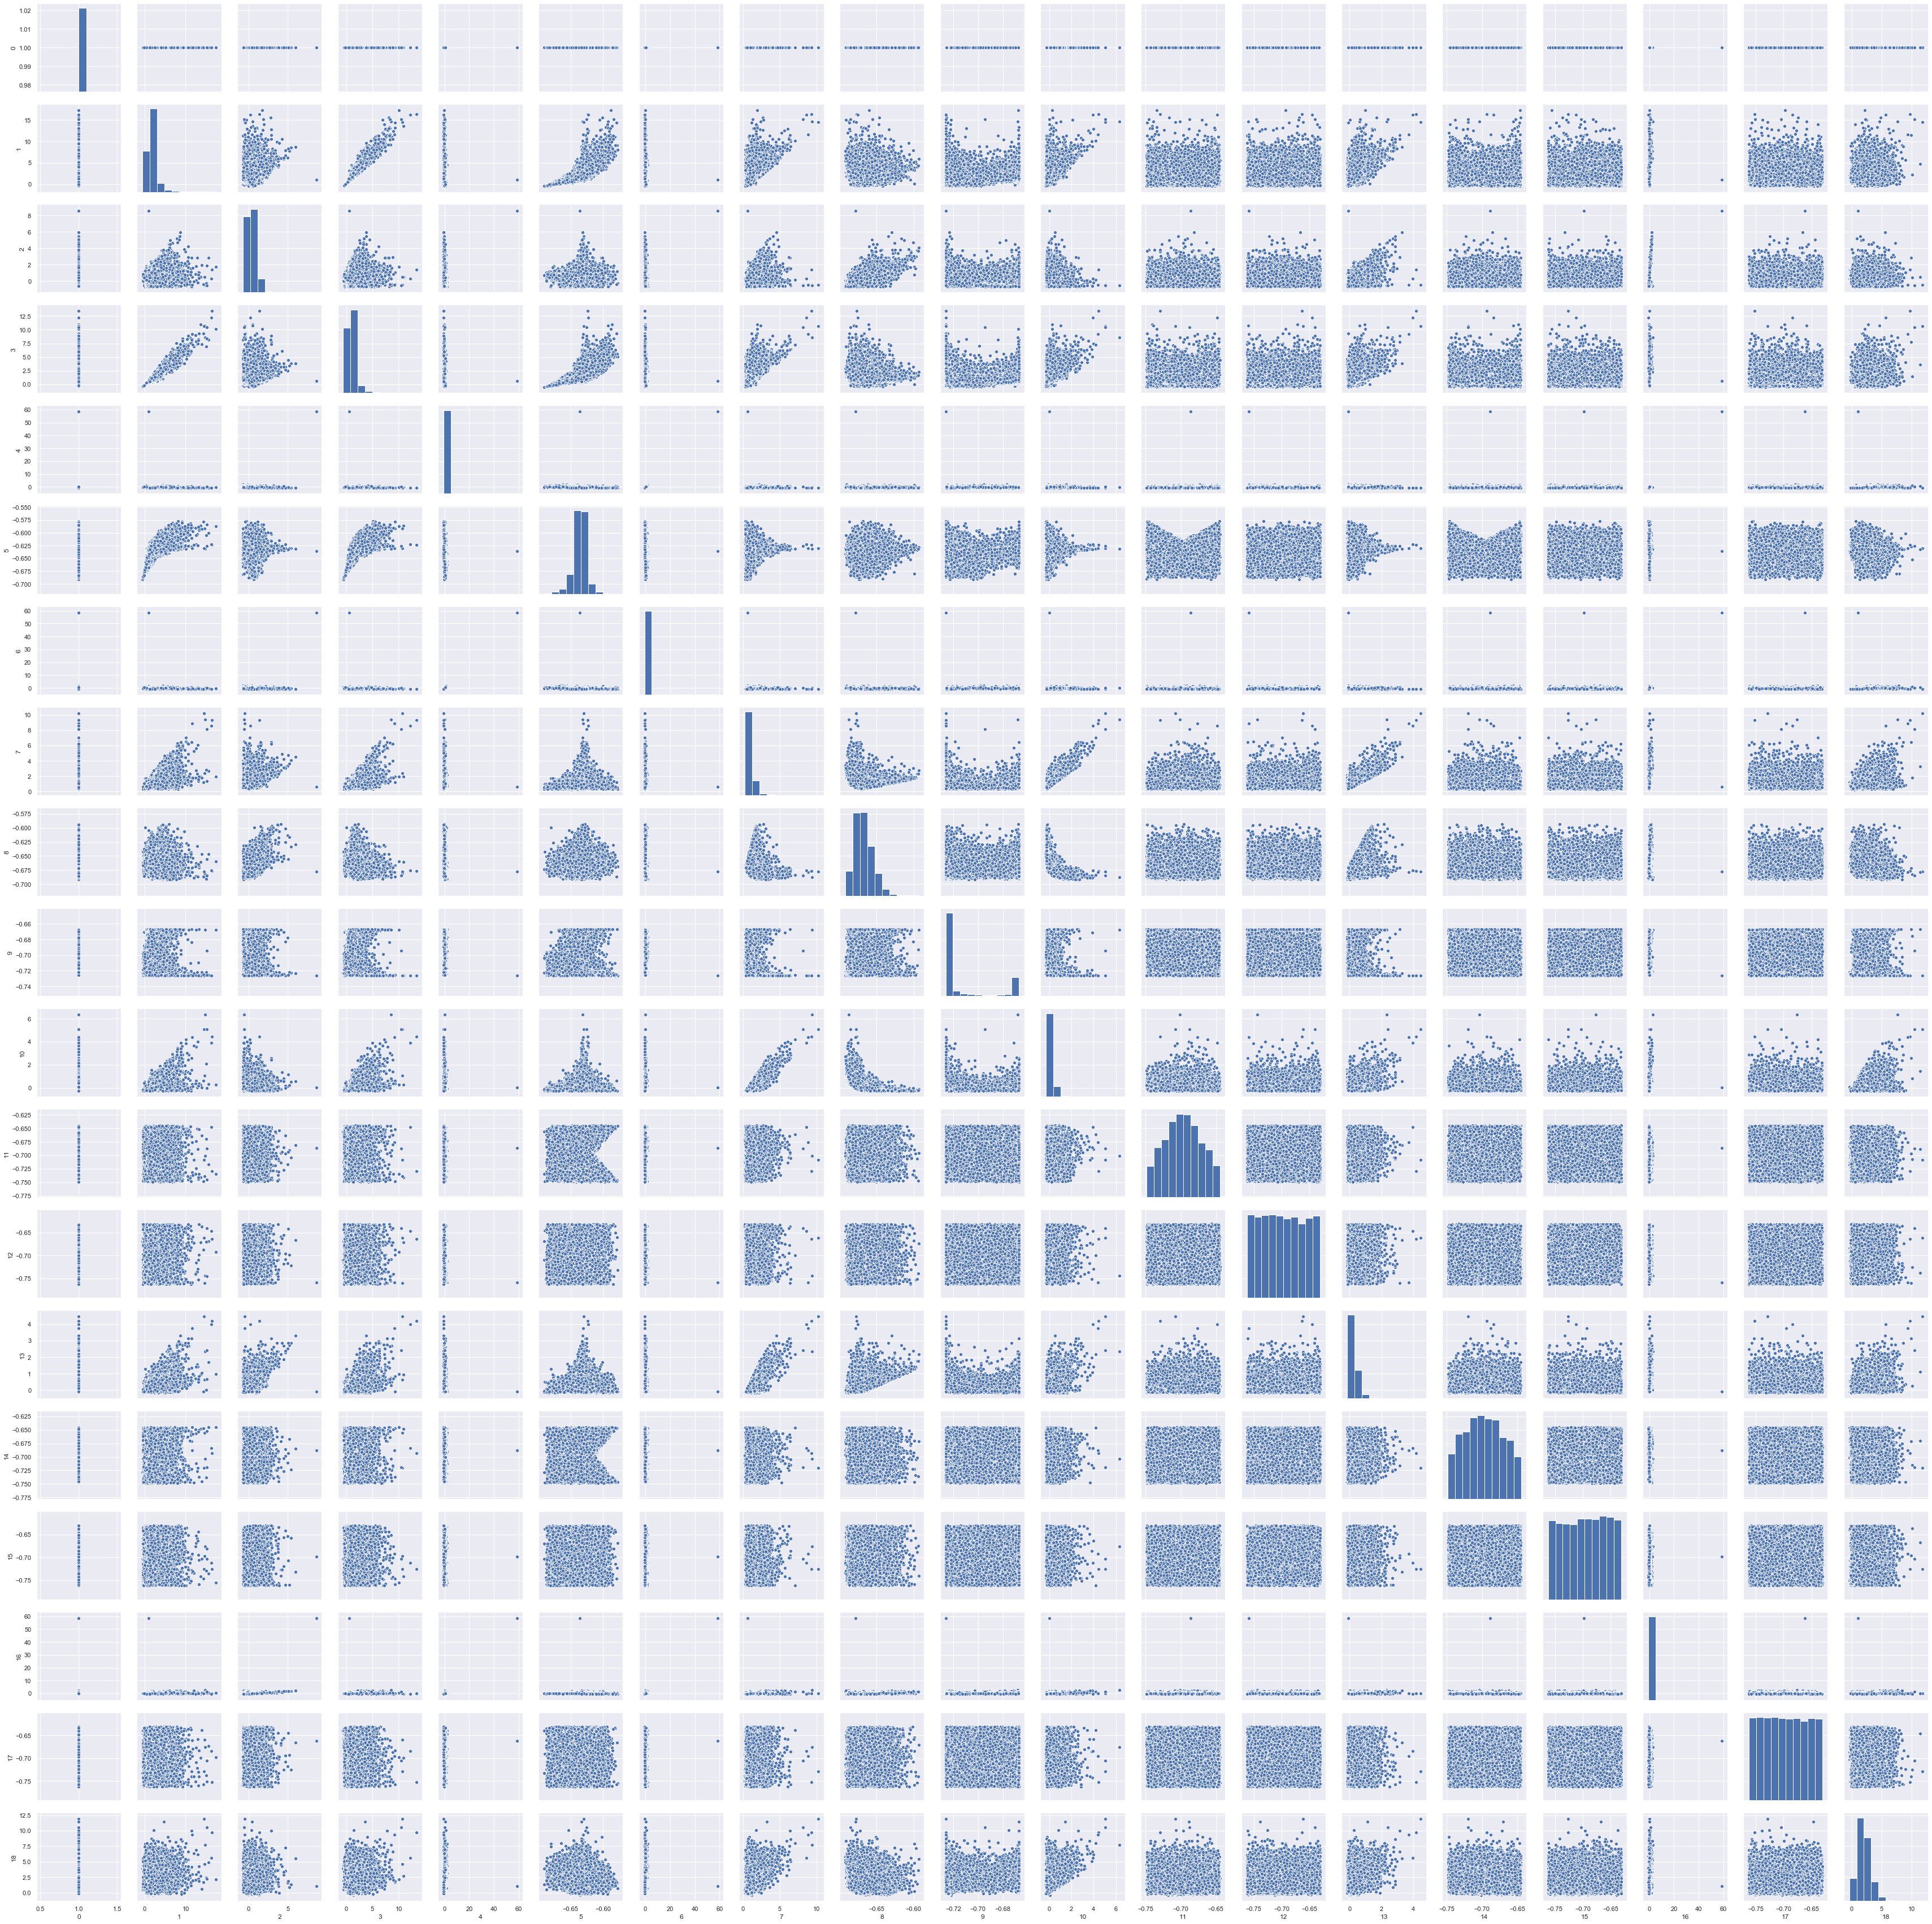

In [93]:
import seaborn as sns
sns.set()
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
df_test=pd.DataFrame(tX_tr[1])
sns.pairplot(df_test, size = 2.5)
plt.show();

In [99]:
df_test.corr()

0         1         2         3         4         5         6         7   \
0  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  NaN  1.000000  0.241425  0.943125 -0.013091  0.661605 -0.013091  0.669311   
2  NaN  0.241425  1.000000  0.197571  0.015384 -0.059709  0.015384  0.243289   
3  NaN  0.943125  0.197571  1.000000 -0.027096  0.602814 -0.027096  0.692797   
4  NaN -0.013091  0.015384 -0.027096  1.000000 -0.182067  1.000000  0.010762   
5  NaN  0.661605 -0.059709  0.602814 -0.182067  1.000000 -0.182067  0.140068   
6  NaN -0.013091  0.015384 -0.027096  1.000000 -0.182067  1.000000  0.010762   
7  NaN  0.669311  0.243289  0.692797  0.010762  0.140068  0.010762  1.000000   
8  NaN  0.100381  0.703216 -0.007292 -0.011026  0.042144 -0.011026 -0.036891   
9  NaN  0.027622 -0.199274 -0.050520  0.379989  0.063471  0.379989 -0.042088   
10 NaN  0.462602 -0.253575  0.524610  0.018887  0.083279  0.018887  0.793333   
11 NaN  0.009346 -0.007586  0.007960  0.000855  0.015698  0.000855 -0.005183   
12 NaN  0.003141  0.000519  0.003016 -0.000625 -0.005308 -0.000625  0.004377   
13 NaN  0.593054  0.647926  0.566935 -0.002202  0.137981 -0.002202  0.781319   
14 NaN  0.003713 -0.016915 -0.000916  0.011325  0.005452  0.011325 -0.003732   
15 NaN -0.005566 -0.002532 -0.004876 -0.003985  0.001285 -0.003985 -0.001471   
16 NaN  0.149796  0.506901  0.102903  0.567826 -0.093463  0.567826  0.164299   
17 NaN -0.000266 -0.012830 -0.000317  0.006378  0.000580  0.006378  0.001947   
18 NaN  0.188790  0.047079  0.201675  0.360294 -0.110492  0.360294  0.339833   

          8         9         10        11        12        13        14  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   0.100381  0.027622  0.462602  0.009346  0.003141  0.593054  0.003713   
2   0.703216 -0.199274 -0.253575 -0.007586  0.000519  0.647926 -0.016915   
3  -0.007292 -0.050520  0.524610  0.007960  0.003016  0.566935 -0.000916   
4  -0.011026  0.379989  0.018887  0.000855 -0.000625 -0.002202  0.011325   
5   0.042144  0.063471  0.083279  0.015698 -0.005308  0.137981  0.005452   
6  -0.011026  0.379989  0.018887  0.000855 -0.000625 -0.002202  0.011325   
7  -0.036891 -0.042088  0.793333 -0.005183  0.004377  0.781319 -0.003732   
8   1.000000 -0.053645 -0.596550 -0.005319  0.003287  0.552758 -0.009715   
9  -0.053645  1.000000  0.001129  0.008355  0.003581 -0.068274  0.015584   
10 -0.596550  0.001129  1.000000  0.000382  0.002381  0.239882  0.005048   
11 -0.005319  0.008355  0.000382  1.000000 -0.005457 -0.008656  0.574995   
12  0.003287  0.003581  0.002381 -0.005457  1.000000  0.004539 -0.008551   
13  0.552758 -0.068274  0.239882 -0.008656  0.004539  1.000000 -0.011127   
14 -0.009715  0.015584  0.005048  0.574995 -0.008551 -0.011127  1.000000   
15 -0.005676  0.004840  0.000968  0.005861 -0.427515 -0.003339  0.001994   
16  0.223115 -0.046067  0.030779 -0.002522  0.000351  0.230444 -0.003998   
17 -0.006990  0.008424  0.005527  0.001287  0.065870 -0.002562  0.005074   
18 -0.095529  0.192543  0.326990  0.000529  0.014783  0.206683  0.007864   

          15        16        17        18  
0        NaN       NaN       NaN       NaN  
1  -0.005566  0.149796 -0.000266  0.188790  
2  -0.002532  0.506901 -0.012830  0.047079  
3  -0.004876  0.102903 -0.000317  0.201675  
4  -0.003985  0.567826  0.006378  0.360294  
5   0.001285 -0.093463  0.000580 -0.110492  
6  -0.003985  0.567826  0.006378  0.360294  
7  -0.001471  0.164299  0.001947  0.339833  
8  -0.005676  0.223115 -0.006990 -0.095529  
9   0.004840 -0.046067  0.008424  0.192543  
10  0.000968  0.030779  0.005527  0.326990  
11  0.005861 -0.002522  0.001287  0.000529  
12 -0.427515  0.000351  0.065870  0.014783  
13 -0.003339  0.230444 -0.002562  0.206683  
14  0.001994 -0.003998  0.005074  0.007864  
15  1.000000 -0.005913 -0.177617 -0.008202  
16 -0.005913  1.000000 -0.004618  0.167183  
17 -0.177617 -0.004618  1.000000  0.001167  
18 -0.008202  0.167183  0.0

In [100]:
df_test

0         1         2         3         4         5         6  \
0      1.0  1.401396  0.052416  0.916815 -0.610317 -0.633372 -0.610317   
1      1.0  0.905883  0.172939  0.507650 -0.257714 -0.641629 -0.257714   
2      1.0  5.969437  1.282294  3.066192  0.087030 -0.616107  0.087030   
3      1.0  3.398875  2.126941  1.464835  0.086152 -0.622859  0.086152   
4      1.0  1.056590 -0.107509  0.508089 -0.422927 -0.632139 -0.422927   
...    ...       ...       ...       ...       ...       ...       ...   
59047  1.0  1.131462  0.701186  0.692260 -0.660943 -0.641817 -0.660943   
59048  1.0  0.448998  0.179273  0.283053  0.162634 -0.661695  0.162634   
59049  1.0  4.062737  1.677894  1.971197  0.212905 -0.636926  0.212905   
59050  1.0  1.287729  0.412272  0.502759 -0.660044 -0.632766 -0.660044   
59051  1.0 -0.048815  0.445277 -0.165513  0.382005 -0.682911  0.382005   

              7         8         9        10        11        12        13  \
0      0.644310 -0.675888 -0.726054 -0.022018 -0.655006 -0.672711 -0.030212   
1      0.548201 -0.679483 -0.725908 -0.011149 -0.688011 -0.655404 -0.137190   
2      1.151863 -0.659312 -0.673568 -0.031863 -0.710022 -0.634083  0.487186   
3      1.124335 -0.635923 -0.726096 -0.229621 -0.708036 -0.662845  0.657416   
4      0.541449 -0.662970 -0.666984 -0.221406 -0.738282 -0.652101  0.066316   
...         ...       ...       ...       ...       ...       ...       ...   
59047  0.757727 -0.659898 -0.725260 -0.168335 -0.690123 -0.633205  0.229543   
59048  0.708815 -0.653355 -0.721894 -0.238233 -0.669931 -0.734436  0.250508   
59049  2.356910 -0.637344 -0.725490  0.100387 -0.658497 -0.676181  1.560004   
59050  0.553803 -0.658748 -0.721727 -0.251192 -0.717024 -0.642172  0.108455   
59051  1.040641 -0.685336 -0.716920  0.434700 -0.700699 -0.699403 -0.090578   

             14        15        16        17        18  
0     -0.682284 -0.729670 -0.409256 -0.641274  1.851865  
1     -0.692652 -0.710126  0.086424 -0.740079  2.105182  
2     -0.651850 -0.689642  0.193277 -0.635212  1.783848  
3     -0.742462 -0.729043  0.834961 -0.671666  1.742232  
4     -0.739348 -0.719031 -0.540942 -0.761902  2.102736  
...         ...       ...       ...       ...       ...  
59047 -0.679546 -0.710858 -0.120050 -0.657577  1.223977  
59048 -0.674320 -0.637678 -0.349287 -0.673986  2.458537  
59049 -0.662908 -0.735648 -0.035082 -0.660023  5.635081  
59050 -0.719867 -0.705883 -0.314631 -0.639601  0.904796  
59051 -0.700135 -0.685796 -0.094069 -0.634062  3.695607  

[59052 rows x 19 columns]

## All already done: skip

In [25]:
tX_pd = pd.read_csv('../data/train.csv')
tX_pd.drop(labels=['Id', 'Prediction'], axis=1, inplace=True)
tX_pd.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2      -999.000                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_phi  \
0               3.064      41.928     197.760  ...       -0.277   
1               3.473       2.078     125.157  ...       -1.916   
2               3.148       9.336     197.814  ...       -2.186   
3               3.310       0.414      75.968  ...        0.060   
4               3.891      16.405      57.983  ...       -0.871   

   PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0        258.733            2              67.435                2.150   
1        164.546            1              46.226                0.725   
2        260.414            1              44.251                2.053   
3         86.062            0            -999.000             -999.000   
4         53.131            0            -999.000             -999.000   

   PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                0.444                 46.062                    1.24   
1                1.158               -999.000                 -999.00   
2               -2.028               -999.000                 -999.00   
3             -999.000               -999.000                 -999.00   
4             -999.000               -999.000                 -999.00   

   PRI_jet_subleading_phi  PRI_jet_all_pt  
0                  -2.475         113.497  
1                -999.000          46.226  
2                -999.000          44.251  
3                -999.000           0.000  
4                -999.000           0.000  

[5 rows x 30 columns]

In [26]:
tX_pd0 = tX_pd[tX_pd['PRI_jet_num']==0]
tX_pd1 = tX_pd[tX_pd['PRI_jet_num']==1]
tX_pd2 = tX_pd[tX_pd['PRI_jet_num']==2]
tX_pd3 = tX_pd[tX_pd['PRI_jet_num']==3]

In [103]:
tX_pds = [tX_pd0, tX_pd1, tX_pd2, tX_pd3]

In [104]:
#searching for nulls:
for jet in range (0, 4):
    print ("jet: {}".format(jet))
    i = 0
    for c in tX_pds[jet]:
        s = tx_pds[jet][tx_pds[jet][c] == -999].index.size
        if s > 0:
            print(s, i, c)
        i+=1

jet: 0
26123 0 DER_mass_MMC
99913 4 DER_deltaeta_jet_jet
99913 5 DER_mass_jet_jet
99913 6 DER_prodeta_jet_jet
99913 12 DER_lep_eta_centrality
99913 23 PRI_jet_leading_pt
99913 24 PRI_jet_leading_eta
99913 25 PRI_jet_leading_phi
99913 26 PRI_jet_subleading_pt
99913 27 PRI_jet_subleading_eta
99913 28 PRI_jet_subleading_phi
jet: 1
7562 0 DER_mass_MMC
77544 4 DER_deltaeta_jet_jet
77544 5 DER_mass_jet_jet
77544 6 DER_prodeta_jet_jet
77544 12 DER_lep_eta_centrality
77544 26 PRI_jet_subleading_pt
77544 27 PRI_jet_subleading_eta
77544 28 PRI_jet_subleading_phi
jet: 2
2952 0 DER_mass_MMC
jet: 3
1477 0 DER_mass_MMC


In [65]:
#searching for zeros:
for jet in range (0, 4):
    print ("jet: {}".format(jet))
    i = 0
    for c in tX_pds[jet]:
        s = tx_pds[jet][tx_pds[jet][c] == 0].index.size
        if s > 1000:
            print(s, i, c)
        i+=1

jet: 0
99913 22 PRI_jet_num
99913 29 PRI_jet_all_pt
jet: 1
jet: 2
9925 12 DER_lep_eta_centrality
jet: 3
5827 12 DER_lep_eta_centrality


In [153]:
# #dealing with outliers
# for jet in range(0, 4):
#     for i in range(0, tX_new[jet].shape[1]):
#         tX_act = tX_new[jet]
#         q1 = np.quantile(tX_act[:,i], 0.25)
#         q3 = np.quantile(tX_act[:,i], 0.75)
#         iqr = q3 - q1
#         max_val = q3 + 1.5*iqr 
#         indexs_out = tX_act[:,i] > max_val
#         #print(tX_act[indexs_out, :].shape)
#         tX_act[indexs_out, :] = max_val

#### Stop Main Preprocessing

In [10]:
def cross_validation(y, x, k_indices, k, lambda_, degree, acc = False, ls = False):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    accuracies = []
    ws = []
    
    for k_group in range(k):
        index_te = k_indices[k_group]
        index_tr = np.setdiff1d(np.arange(len(y)), index_te)
        #print(index_te, index_tr)
        x_te = x[index_te]
        x_tr = x[index_tr]
        y_te = y[index_te]
        y_tr = y[index_tr]
        
        # form data with polynomial degree
        x_te_poly = build_poly(x_te, degree)
        x_tr_poly = build_poly(x_tr, degree)
        
        if (ls==False):
            w = ridge_regression(y_tr, x_tr_poly, lambda_)
        else:
            w = least_squares_lstsq_ver(y_tr, x_tr_poly)
        
        # calculate the loss for train and test data
        rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
        rmse_te = compute_rmse(y_te, x_te_poly, w)
        #print(lambda_, rmse_te)
        losses_tr.append(rmse_tr)
        losses_te.append(rmse_te)
        
        y_pred = predict_labels(w, x_te_poly)
        accuracies.append(accuracy(y_te, y_pred))
        
        ws.append(w)
        
    if acc==False:
        loss_tr = np.median(losses_tr)
        loss_te = np.median(losses_te)
        return loss_tr, loss_te, np.mean(ws, axis=0)
    else:
        return np.mean(accuracies), np.mean(ws, axis=0)

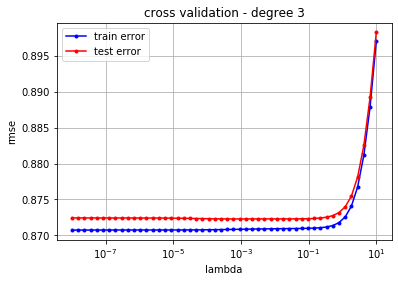

In [237]:
def cross_validation_demo():
    degree = 3
    k_fold = 4
    lambdas = np.logspace(-8, 1, 50)
#     for d in range (1, degree+1):
#         for i in range (0, 3):
    #seed = i
    # split data in k fold
    #y_sub, x_sub = get_subsample(y_tr, x_tr, 10000, seed)
    seed = 1
    k_indices = build_k_indices(y_tr[0], k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y_tr[0], x_tr[0], k_indices, k_fold, lambda_, degree)
        #print(loss_te)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te, degree)

cross_validation_demo()

In [28]:
def select_best_degree(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 100000, seed)
    lambdas = np.logspace(-10, 0, 30)
    #lambdas=[1e-06]
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    w_star = 0
    for degree in range(1, max_degree+1):
        for lambda_ in lambdas:
            #print(degree)
            loss_tr, loss_te, w = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
            #print(loss_te)
            if loss_te < loss_min:
                loss_min = loss_te
                print("New loss: {}, degree: {}, lambda: {}".format(loss_te, degree, lambda_))
                degree_star = degree
                lambda_star = lambda_
                w_star = w
    return degree_star, lambda_star, loss_min, w_star

In [8]:
def select_best_degree_accuracy(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 100000, seed)
    lambdas = np.logspace(-10, 0, 5)
    #lambdas=[1e-06]
    k_indices = build_k_indices(y, k_fold, seed)
    acc_max = 0
    degree_star = 0
    lambda_star = 0
    w_star = 0
    for degree in range(1, max_degree+1):
        for lambda_ in lambdas:
            #print(degree)
            accuracy, w = cross_validation(y, x, k_indices, k_fold, lambda_, degree, acc=True)
            #print(loss_te)
            if accuracy > acc_max:
                acc_max = accuracy
                print("New accuracy: {}, degree: {}, lambda: {}".format(accuracy, degree, lambda_))
                degree_star = degree
                lambda_star = lambda_
                w_star = w
    return degree_star, lambda_star, acc_max, w_star

In [29]:
max_degree = 8
k_fold = 12
degrees_star=[]
lambdas_star=[]
w_star = []
for jet in range(0, 8):
    print("jet {}: ".format(jet))
    degree_star, lambda_star, loss, w = select_best_degree(y_tr[jet], tX_tr[jet], max_degree, k_fold, 1)
    degrees_star.append(degree_star)
    lambdas_star.append(lambda_star)
    w_star.append(w)
    #print("jet {}: Best accuracy {}, degree: {},  lambda: {}".format(jet, acc, degree_star, lambda_star))
    print("jet {}: best loss: {}, degree: {}, lambda: {}".format(jet, loss, degree_star, lambda_star))

jet 0: 
New loss: 0.4210766055686129, degree: 1, lambda: 1e-10
New loss: 0.42107626495207184, degree: 1, lambda: 1.2689610031679235e-07
New loss: 0.42106839951308206, degree: 1, lambda: 2.807216203941181e-07
New loss: 0.42105301232293113, degree: 1, lambda: 6.210169418915616e-07
New loss: 0.42102712706019707, degree: 1, lambda: 1.3738237958832638e-06
New loss: 0.42099713438526065, degree: 1, lambda: 3.039195382313201e-06
New loss: 0.42001074978158415, degree: 2, lambda: 1e-10
New loss: 0.42000917638986063, degree: 2, lambda: 4.893900918477499e-10
New loss: 0.41893202270277013, degree: 3, lambda: 0.008531678524172814
New loss: 0.41774533414290627, degree: 4, lambda: 0.0007880462815669921
New loss: 0.4167993150175928, degree: 6, lambda: 1e-10
New loss: 0.4167642593155737, degree: 6, lambda: 5.298316906283702e-09
New loss: 0.41671794293327874, degree: 6, lambda: 1.1721022975334793e-08
New loss: 0.4166862003257903, degree: 6, lambda: 2.592943797404667e-08
jet 0: best loss: 0.41668620032579

In [6]:
#another 0.812 (based on losses)
degrees = [6, 4, 2, 8, 4, 8, 1, 8]
lambdas = [2.592943797404667e-08, 3.039195382313201e-06, 1e-10, 0.0003562247890262444, 0.0007880462815669921, 1e-10, 0.04175318936560409, 6.210169418915616e-07]

In [21]:
max_degree = 8
k_fold = 12
degrees_star=[]
lambdas_star=[]
w_star = []
for jet in range(0, 8):
    print("jet {}: ".format(jet))
    degree_star, lambda_star, acc, w = select_best_degree_accuracy(y_tr[jet], tX_tr[jet], max_degree, k_fold, 1)
    degrees_star.append(degree_star)
    lambdas_star.append(lambda_star)
    w_star.append(w)
    print("jet {}: Best accuracy {}, degree: {},  lambda: {}".format(jet, acc, degree_star, lambda_star))
    #print("jet {}: best loss: {}, degree: {}, lambda: {}".format(jet, loss, degree_star, lambda_star))

jet 0: 
New accuracy: 0.946377228292122, degree: 1, lambda: 1e-10
New accuracy: 0.946425148552808, degree: 1, lambda: 2.1544346900318822e-07
New accuracy: 0.9471439524631015, degree: 2, lambda: 1e-10
New accuracy: 0.9472877132451599, degree: 3, lambda: 1e-10
New accuracy: 0.9473356335058462, degree: 3, lambda: 6.614740641230146e-08
New accuracy: 0.9474314740272186, degree: 3, lambda: 1.1937766417144357e-07
New accuracy: 0.9486294805443741, degree: 4, lambda: 1e-10
New accuracy: 0.9486774008050602, degree: 4, lambda: 5.878016072274924e-10
New accuracy: 0.9488211615871189, degree: 4, lambda: 1.0608183551394483e-09
New accuracy: 0.9489170021084914, degree: 4, lambda: 1.9144819761699535e-09
New accuracy: 0.9491566034119225, degree: 5, lambda: 1e-10
New accuracy: 0.9492045236726088, degree: 5, lambda: 1.8047217668271666e-10
New accuracy: 0.949252443933295, degree: 5, lambda: 3.257020655659783e-10
New accuracy: 0.9493003641939812, degree: 5, lambda: 5.878016072274924e-10
New accuracy: 0.9493

In [ ]:
#0.812 with 8 jets:
degrees = [6, 4, 4, 7, 8, 8, 1, 8]
lambdas = [3.162277660168379e-08, 1e-05, 3.162277660168379e-08, 1e-05, 3.162277660168379e-08, 1e-10, 1e-05, 1e-10]

In [66]:
#0.805 with 8 jets:
degrees = [6, 3, 1, 5, 2, 7, 7, 1, 7]
lambdas = [1e-10, 3.162277660168379e-08, 0.0031622776601683794, 3.162277660168379e-08, 1e-05, 1e-10, 1e-10, 3.162277660168379e-08]

In [8]:
#accuracy
degrees = [5, 8, 8, 8]
lambdas = [2.807216203941181e-07, 2.807216203941181e-07, 1e-10, 2.2122162910704502e-10]

In [43]:
def select_best_degree_ls(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 50000, seed)
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        rmse_te = []
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, 0, degree, mean=True, ls=True)
        #print(degree, lambda_, loss_te)
        if loss_te < loss_min:
            loss_min = loss_te
            print("New loss: {}, degree: {}".format(loss_te, degree))
            degree_star = degree
    return degree_star

In [52]:
max_degree = 13
k_fold = 8
degrees_star_ls = []
for jet in range(0, 4):
    degree_star_ls = select_best_degree_ls(y_tr[jet], tX_tr[jet], max_degree, k_fold, 1)
    degrees_star_ls.append(degree_star_ls)
    print("Best degree for jet {} for least squares: {}".format(jet, degree_star_ls))

New loss: 0.7361479935065579, degree: 1
New loss: 0.7081331175137364, degree: 2
New loss: 0.7042588060195737, degree: 3
New loss: 0.7031084041385761, degree: 4
Best degree for least squares: 4
New loss: 0.8642239524433158, degree: 1
New loss: 0.8280068635705337, degree: 2
New loss: 0.8255413920585553, degree: 3
New loss: 0.8214537575154983, degree: 5
Best degree for least squares: 5
New loss: 0.8417973669655965, degree: 1
New loss: 0.8074770514863915, degree: 2
New loss: 0.7993306312028321, degree: 4
Best degree for least squares: 4
New loss: 0.8454785517535026, degree: 1
New loss: 0.8173852852871264, degree: 2
New loss: 0.8039465316482824, degree: 5
Best degree for least squares: 5


In [71]:
#acc 0.7888 ridge (0.798 on real test)
lambdas = [1e-09, 1.1288378916846883e-08, 0.00018329807108324338, 1e-09]
degrees = [3, 5, 5, 5]

In [9]:
#acc 0.79634 ridge (0.785 on real test)
lambdas = [1e-07, 1e-07, 1e-08, 1e-08]
degrees = [5, 5, 5, 6]

In [ ]:
#acc 0.79636
lambdas = [2.807216203941181e-07, 2.807216203941181e-07, 1e-10, 2.2122162910704502e-10]
degrees = [5, 5, 5, 6]

In [61]:
#good 0.79 acc least square (lstsq ver)
degrees_ls = [4, 5, 4, 5]

## Start working

In [46]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        new_w = w - gamma*g;
        new_loss = compute_loss(y, tx, new_w)
        # print TO DELETE IN FINAL VERSION
        if new_loss <= loss:
            loss, w = new_loss, new_w
            gamma *=1.8 #accelerate algorithm learning rate
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3 #decelerate to avoid exponential growing
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [47]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.0001

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
gradient_w, gradient_loss = gradient_descent(y, tX, w_initial, max_iters, gamma)

Gradient Descent(0/199): ||gradient||=0.9198964473372747, loss=0.49991543478685996, w0=-3.1381702249274604e-05, w1=-1.870332018899931e-05
Gradient Descent(1/199): ||gradient||=0.9186848945865361, loss=0.4997636980245322, w0=-8.78042153832626e-05, w1=-5.236507656267239e-05
Gradient Descent(2/199): ||gradient||=0.9165086790795948, loss=0.4994921215723027, w0=-0.00018915591588298592, w1=-0.00011294257728487969
Gradient Descent(3/199): ||gradient||=0.9126063083581455, loss=0.4990082616199879, w0=-0.000370914263529803, w1=-0.0002219378872869192
Gradient Descent(4/199): ||gradient||=0.9056299309807633, loss=0.49815319084166065, w0=-0.0006959041130019329, w1=-0.00041798666987893115
Gradient Descent(5/199): ||gradient||=0.8932269289430593, loss=0.49666407351067016, w0=-0.0012739014639035493, w1=-0.0007704142328603178
Gradient Descent(6/199): ||gradient||=0.8713980371643467, loss=0.49413764114400255, w0=-0.002292032255140569, w1=-0.0014033062129404496
Gradient Descent(7/199): ||gradient||=0.833

In [48]:
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient(yn, xn, w)
            new_w = w - gamma*g;
            new_loss = compute_loss(y, tx, new_w)
        if new_loss <= loss:
            loss , w = new_loss , new_w
            gamma *=1.8
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             #     bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [49]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
sgd_loss, sgd_w = stochastic_gradient_descent(
    y, tX, w_initial, batch_size, max_iters, gamma)


SGD(0/99): |gradient|=3.819894318273993, loss=0.5415004344865282, w0=0.011805540261408516, w1=-0.002686097454581817
SGD(1/99): |gradient|=3.313465869115332, loss=0.5415004344865282, w0=0.011805540261408516, w1=-0.002686097454581817
SGD(2/99): |gradient|=2.7465500598415247, loss=0.5231169592050283, w0=0.006188461831573778, w1=-0.003969062074416842
SGD(3/99): |gradient|=3.2750457421264016, loss=0.49026883819335143, w0=-0.0036366473237117534, w1=-0.008645873148768043
SGD(4/99): |gradient|=3.648974628785057, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(5/99): |gradient|=3.4494660744980905, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(6/99): |gradient|=3.143628555043909, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(7/99): |gradient|=2.8915114659527927, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(8/99): |gradient|=2.897412774883511, loss=0.4714873513207

In [46]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.solve(G,tx.T.dot(y))
    return w

In [48]:
def least_squares_lstsq_ver(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.lstsq(G,tx.T.dot(y), rcond=None) [0]
    return w

In [55]:
w = []
for jet in range(0,4):
    x_tr_poly = build_poly(tX_tr[jet], degrees_star_ls[jet])
    w.append(least_squares_lstsq_ver(y_tr[jet], x_tr_poly))
    print(compute_loss(y_te[jet], build_poly(tX_te[jet], degrees_star_ls[jet]), w[jet]))

0.25108353401177774
2.302894037351024
0.32681724036218224
0.47402537599287914


In [18]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = len(y)
    G = tx.T.dot(tx)
    i = np.linalg.inv(G + 2*N*lambda_*np.eye(G.shape[0]))
    w_star = i.dot(tx.T).dot(y)
    return w_star

In [32]:
#degrees star version
w = []
for jet in range(0,8):
    x_tr_poly = build_poly(tX_tr[jet], degrees_star[jet])
    w.append(ridge_regression(y_tr[jet], x_tr_poly, lambdas_star[jet]))
    print(compute_loss(y_te[jet], build_poly(tX_te[jet], degrees_star[jet]), w[jet]))

0.08943657353461508
0.3051171834334052
0.22457166576535947
0.35644593836806904
0.1830405563423213
0.3396365579279473
0.1295151765911767
0.5784025142897178


In [19]:
#degrees saved version
w = []
for jet in range(0,8):
    x_tr_poly = build_poly(tX_tr[jet], degrees[jet])
    w.append(ridge_regression(y_tr[jet], x_tr_poly, lambdas[jet]))
    print(compute_loss(y_te[jet], build_poly(tX_te[jet], degrees[jet]), w[jet]))

0.08943657353461508
0.3051171834334052
0.22457166576535947
0.35644593836806904
0.1830405563423213
0.3396365579279473
0.1295151765911767
0.5784025142897178


## Generate predictions and save ouput in csv format for submission:

#### Use Accuracy and F1 Score on our classification:

In [20]:
y_pred = build_predictions(tX_te, indexes_te, w, degrees) #leave degree blank if it's not polynomial

In [ ]:
#cell for logistic
y_pred = build_predictions(tX_te, indexes_te, w, degrees, logistic=True) #leave degree blank if it's not polynomial, add logistic flag to build [0,1]

In [21]:
acc = accuracy(y_te_tot, y_pred)
print(acc)

0.80268


#### Build submission

In [35]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test_new, indexes_test_new, means_test, stds_test = preprocessing([], tX_test, test=True) #same function as train, test=True is to avoid computation on the y

In [39]:
#cell for normal regression
y_pred_test = build_predictions(tX_test_new, indexes_test_new, w_star, degrees_star)
OUTPUT_PATH = '../data/submission.csv'
create_csv_submission(ids_test, y_pred_test, OUTPUT_PATH)

In [ ]:
#cell for logistic
y_pred_test = build_predictions(tX_test_new, indexes_test_new, w, degrees, logistic=True)
OUTPUT_PATH = '../data/submission.csv'
create_csv_submission(ids_test, y_pred_test, OUTPUT_PATH, logistic=True) #logistic flags convert [0, 1] to [-1, 1]

In [12]:
#we will need something like this

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tX_test_s)
plt.scatter(principalComponents[:,0], principalComponents[:,1])

NameError: name 'tX_test_s' is not defined